# Статистический анализ двух бинарных выборок

## 📊 Условие задачи

### Исходные данные:
- **Две бинарные выборки** с вероятностями успеха:
  - $p_1 = 0.35$ (первая выборка)
  - $p_2 = 0.40$ (вторая выборка)
- **Уровень значимости**: $\alpha = 0.05$ (p-value)
- **Минимальный детектируемый эффект (MDE)**: $\delta = |p_2 - p_1| = 0.05$

### Поставленные задачи:

#### 1. 📈 Определение минимального размера выборки
**Цель**: Найти минимальное количество элементов $n$ в каждой выборке, необходимое для детекции MDE с заданной мощностью теста ($1 - \beta = 0.8$).

**Формула для расчета**:
$$
n = \frac{(z_{1-\alpha/2} \cdot \sqrt{2 \cdot \bar{p} \cdot (1-\bar{p})} + z_{1-\beta} \cdot \sqrt{p_1(1-p_1) + p_2(1-p_2)})^2}{(p_1 - p_2)^2}
$$

где:
- $\bar{p} = \frac{p_1 + p_2}{2}$ - объединенная пропорция
- $z_{1-\alpha/2}$ - квантиль нормального распределения для двустороннего теста
- $z_{1-\beta}$ - квантиль нормального распределения для мощности теста

#### 2. 🔄 Преобразование распределений через ЦПТ
**Цель**: Используя Центральную Предельную Теорему (ЦПТ), преобразовать биномиальные распределения к нормальным.

**Формулы преобразования**:
- Для выборки размера $n$ с вероятностью $p$:
  $$
  \text{Среднее: } \mu = p
  $$
  $$
  \text{Стандартное отклонение: } \sigma = \sqrt{\frac{p(1-p)}{n}}
  $$
- Получаем нормальные распределения:
  - Первая выборка: $N(\mu_1, \sigma_1)$
  - Вторая выборка: $N(\mu_2, \sigma_2)$

#### 3. 📊 Визуализация распределений и ошибок
**Требуется построить два графика**:

**График 1**: Двусторонняя альтернатива
- Распределения обеих выборок
- Критические области для ошибки I рода ($\alpha$)
- Область ошибки II рода ($\beta$)

**График 2**: Односторонняя альтернатива ($p_1 > p_2$)
- Распределения обеих выборок  
- Односторонние критические области
- Соответствующие области ошибок

**Обозначения на графиках**:
- 🟦 **Синяя область** - Ошибка I рода (вероятность $\alpha$)
- 🟥 **Красная область** - Ошибка II рода (вероятность $\beta$)
- 📍 **Вертикальные линии** - Критические значения и средние

#### 4. 📐 Расчет доверительных интервалов
**Цель**: Построить $95\%$ доверительные интервалы для средних значений обеих выборок.

**Формула доверительного интервала**:
$$
CI = \hat{p} \pm z_{1-\alpha/2} \cdot \sqrt{\frac{\hat{p}(1-\hat{p})}{n}}
$$

где:
- $\hat{p}$ - выборочная пропорция
- $z_{1-\alpha/2}$ - квантиль стандартного нормального распределения

### 🎯 Ожидаемые результаты:

1. **Числовой результат**: Минимальный размер выборки $n$
2. **Параметры распределений**: $\mu_1, \sigma_1, \mu_2, \sigma_2$
3. **Визуализация**: Два графика с областями статистических ошибок
4. **Интервальные оценки**: Доверительные интервалы для $p_1$ и $p_2$

### 📈 Статистические гипотезы:

**Для двустороннего теста**:
$$
H_0: p_1 = p_2 \\
H_1: p_1 \neq p_2
$$

**Для одностороннего теста**:
$$
H_0: p_1 \leq p_2 \\
H_1: p_1 > p_2
$$

In [1]:
# Импорты, необходимые для решения задач
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Решение задания № 1: Определение минимального размера выборки

In [2]:
# === 1) Исходные данные из условия ===

# Вероятность успеха в группе A
p1 = 0.35
# Вероятность успеха в группе B
p2 = 0.40
# Уровень значимости (двусторонний тест)
alpha = 0.05
# Мощность теста = 1 - beta
power = 0.80
# Минимально детектируемый эффект (MDE) -> разница, которую хотим детектить
delta = abs(p2 - p1)


# === 2) Квантиль стандартного нормального распределения ===
def z_quantile_standard_normal(p: float) -> float:
    """
    Возвращает квантиль стандартного нормального распределения N(0, 1) для вероятности p.

    Пояснение:
        - Нам нужен z такой, что P(Z <= z) = p, где Z ~ N(0,1).
        - В scipy это norm.ppf(p).

    Почему не всегда scipy:
        - Иногда в окружениях scipy может быть недоступен.
        - Поэтому делаем попытку через math.erfinv (если есть),
          а если нет -> используем scipy как fallback.
    """
    # Основная идея:
    # z = sqrt(2) * erfinv(2p - 1),
    # потому что CDF нормального распределения выражается через erf.
    try:
        return math.sqrt(2) * math.erfinv(2 * p - 1)
    except AttributeError:
        # Если math.erfinv нет -> используем scipy
        from scipy.stats import norm
        return float(norm.ppf(p))


# === 3) Считаем необходимые z-квантили ===
# Для двустороннего теста -> критическая область делится на два хвоста (alpha/2 в каждом хвосте)
# Поэтому берем квантиль -> z_{1 - alpha/2}
z_alpha_over_2 = z_quantile_standard_normal(1 - alpha / 2)

# Для мощности power = 1 - beta.
# Используется квантиль z_{1 - beta} = z_{power}.
z_power = z_quantile_standard_normal(power)

# === 4) Считаем объединенную пропорцию p_bar ===
# В формуле используется p_bar = (p1 + p2)/2 -> это "средняя" вероятность успеха,
# которая используется для оценки дисперсии в части, отвечающей за контроль alpha.
p_bar = (p1 + p2) / 2

# === 5) Считаем компоненты формулы ===
# term_alpha -> "часть за значимость" (контроль ошибки I рода).
# sqrt(2*p_bar*(1-p_bar)) -> это стандартное отклонение разности двух долей
# при предположении близких долей и равных размеров групп.
term_alpha = z_alpha_over_2 * math.sqrt(2 * p_bar * (1 - p_bar))

# term_power -> "часть за мощность" (контроль ошибки II рода)
# sqrt(p1(1-p1) + p2(1-p2)) -> общий "шум" двух долей при альтернативе
term_power = z_power * math.sqrt(p1 * (1 - p1) + p2 * (1 - p2))

# === 6) Подставляем в формулу размера выборки ===
# n_raw -> нецелое число (теоретически). В реальности количество наблюдений должно быть целым.
n_raw = ((term_alpha + term_power) ** 2) / (delta ** 2)

# Минимальный размер выборки -> округление вверх (ceil),
# потому что n должно быть не меньше рассчитанного.
n_per_group = math.ceil(n_raw)

# Общий размер эксперимента -> две группы одинакового размера.
n_total = 2 * n_per_group

# === 7) Печатаем подробный результат ===
print("=== INPUT ===")
print(f"p1 = {p1}")
print(f"p2 = {p2}")
print(f"alpha = {alpha} (двусторонний тест)")
print(f"power = {power}")
print(f"delta (MDE) = {delta}")

print("\n=== STEP 1: z-квантили ===")
print(f"z_(1 - alpha/2) = z_(1 - {alpha}/2) = {z_alpha_over_2:.6f}")
print(f"z_(power) = z_({power}) = {z_power:.6f}")

print("\n=== STEP 2: объединенная пропорция ===")
print(f"p_bar = (p1 + p2)/2 = {p_bar:.6f}")

print("\n=== STEP 3: компоненты формулы ===")
print(f"term_alpha = z_(1-alpha/2) * sqrt(2*p_bar*(1-p_bar)) = {term_alpha:.6f}")
print(f"term_power = z_(power) * sqrt(p1(1-p1) + p2(1-p2)) = {term_power:.6f}")

print("\n=== STEP 4: размер выборки ===")
print(f"n_raw = ((term_alpha + term_power)^2) / delta^2 = {n_raw:.6f}")
print(f"n_per_group = ceil(n_raw) = {n_per_group}")
print(f"n_total = 2 * n_per_group = {n_total}")

=== INPUT ===
p1 = 0.35
p2 = 0.4
alpha = 0.05 (двусторонний тест)
power = 0.8
delta (MDE) = 0.050000000000000044

=== STEP 1: z-квантили ===
z_(1 - alpha/2) = z_(1 - 0.05/2) = 1.959964
z_(power) = z_(0.8) = 0.841621

=== STEP 2: объединенная пропорция ===
p_bar = (p1 + p2)/2 = 0.375000

=== STEP 3: компоненты формулы ===
term_alpha = z_(1-alpha/2) * sqrt(2*p_bar*(1-p_bar)) = 1.341896
term_power = z_(power) * sqrt(p1(1-p1) + p2(1-p2)) = 0.575450

=== STEP 4: размер выборки ===
n_raw = ((term_alpha + term_power)^2) / delta^2 = 1470.485463
n_per_group = ceil(n_raw) = 1471
n_total = 2 * n_per_group = 2942


# Решение задания № 2: Преобразование распределений через ЦПТ

In [3]:
# === 1) Исходные данные ===
p1 = 0.35
p2 = 0.40
# Из задания 1: n_per_group = ceil(1470.485463) = 1471
n_per_group = 1471


# === 2) Вспомогательная функция -> параметры нормального приближения p_hat ===
def clt_normal_params_for_proportion(p: float, n: int) -> dict:
    """
    Считает параметры нормального приближения для доли успехов p_hat.

    mu:
        Матожидание доли успехов p_hat. По ЦПТ примерно равно p.
    sigma:
        Стандартное отклонение доли успехов p_hat:
            sigma = sqrt(p*(1-p)/n)

    checks:
        Проверка применимости (классическое правило):
            n*p >= 10
            n*(1-p) >= 10
    """
    # Центр распределения доли успехов
    mu = p
    # "Шум" доли успехов (стандартная ошибка)
    sigma = math.sqrt(p * (1 - p) / n)

    np_ = n * p
    n1p_ = n * (1 - p)
    ok = (np_ >= 10) and (n1p_ >= 10)

    return {
        "p": p,
        "n": n,
        "mu": mu,
        "sigma": sigma,
        "np": np_,
        "n(1-p)": n1p_,
        "normal_approx_ok": ok,
    }


# === 3) Считаем параметры для двух выборок ===
g1 = clt_normal_params_for_proportion(p1, n_per_group)
g2 = clt_normal_params_for_proportion(p2, n_per_group)

# === 4) Печать результата ===
print("=== INPUT (из задания 1) ===")
print(f"p1 = {p1}")
print(f"p2 = {p2}")
print(f"n_per_group = {n_per_group}")

print("\n=== ЦПТ: биномиальное -> нормальное (для доли успехов p_hat) ===")
print("Формулы:")
print("  mu ~ p")
print("  sigma = sqrt(p*(1-p)/n)")

print("\n--- Первая выборка ---")
print(f"mu1 = {g1['mu']:.6f}")
print(f"sigma1 = {g1['sigma']:.6f}")
print(f"Проверка: n*p = {g1['np']:.2f}, n*(1-p) = {g1['n(1-p)']:.2f}")
print(f"Нормальное приближение применимо? {g1['normal_approx_ok']}")
print(f"Итог: p_hat_1 ~ N(mu1={g1['mu']:.6f}, sigma1={g1['sigma']:.6f})")

print("\n--- Вторая выборка ---")
print(f"mu2 = {g2['mu']:.6f}")
print(f"sigma2 = {g2['sigma']:.6f}")
print(f"Проверка: n*p = {g2['np']:.2f}, n*(1-p) = {g2['n(1-p)']:.2f}")
print(f"Нормальное приближение применимо? {g2['normal_approx_ok']}")
print(f"Итог: p_hat_2 ~ N(mu2={g2['mu']:.6f}, sigma2={g2['sigma']:.6f})")

# Дополнительно: распределение разности долей
diff_mu = g2["mu"] - g1["mu"]
diff_sigma = math.sqrt(g1["sigma"] ** 2 + g2["sigma"] ** 2)

print("\n=== Дополнительно (для A/B) ===")
print(f"mu_diff = mu2 - mu1 = {diff_mu:.6f}")
print(f"sigma_diff = sqrt(sigma1^2 + sigma2^2) = {diff_sigma:.6f}")
print(f"Итог: (p_hat_2 - p_hat_1) ~ N(mu_diff={diff_mu:.6f}, sigma_diff={diff_sigma:.6f})")

=== INPUT (из задания 1) ===
p1 = 0.35
p2 = 0.4
n_per_group = 1471

=== ЦПТ: биномиальное -> нормальное (для доли успехов p_hat) ===
Формулы:
  mu ~ p
  sigma = sqrt(p*(1-p)/n)

--- Первая выборка ---
mu1 = 0.350000
sigma1 = 0.012436
Проверка: n*p = 514.85, n*(1-p) = 956.15
Нормальное приближение применимо? True
Итог: p_hat_1 ~ N(mu1=0.350000, sigma1=0.012436)

--- Вторая выборка ---
mu2 = 0.400000
sigma2 = 0.012773
Проверка: n*p = 588.40, n*(1-p) = 882.60
Нормальное приближение применимо? True
Итог: p_hat_2 ~ N(mu2=0.400000, sigma2=0.012773)

=== Дополнительно (для A/B) ===
mu_diff = mu2 - mu1 = 0.050000
sigma_diff = sqrt(sigma1^2 + sigma2^2) = 0.017827
Итог: (p_hat_2 - p_hat_1) ~ N(mu_diff=0.050000, sigma_diff=0.017827)


# Решение задания № 3: Визуализация распределений и ошибок

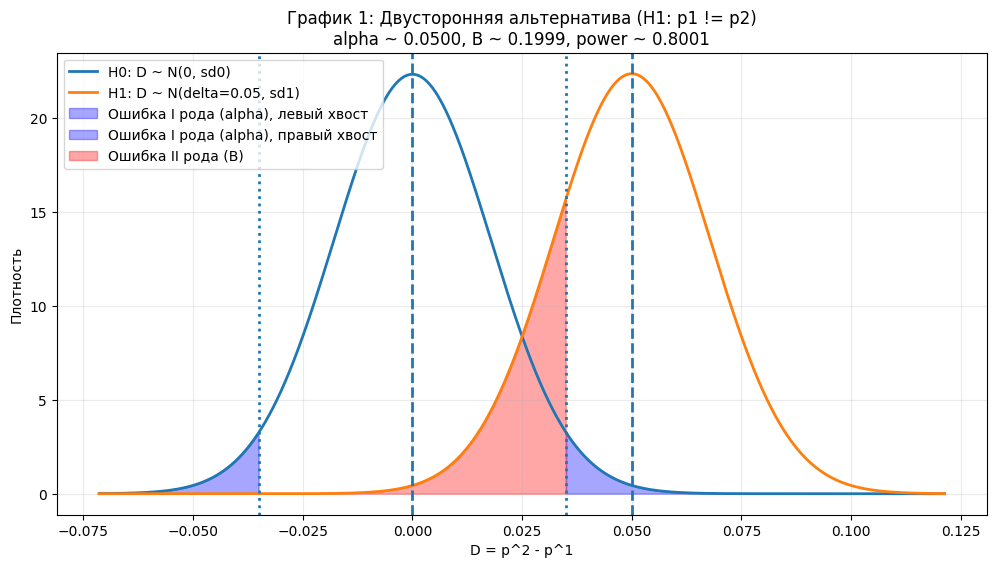

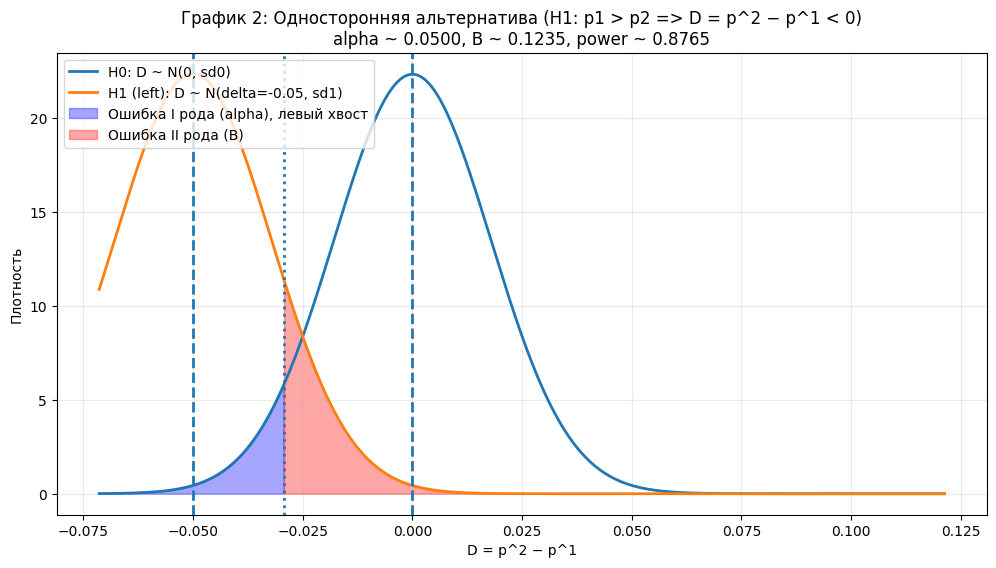

=== Числа для отчета ===
p_bar = 0.375000
sd0 (H0) = sqrt(2*p_bar*(1-p_bar)/n) = 0.017851
sd1 (H1) = sqrt(p1(1-p1)/n + p2(1-p2)/n) = 0.017827

--- Двусторонний тест ---
z_(1-alpha/2) = 1.959964
crit_left_2s = -0.034987, crit_right_2s = 0.034987
alpha_actual ~ 0.050000
beta_actual  ~ 0.199862
power        ~ 0.800138

--- Односторонний тест (левый хвост, H1: p1>p2) ---
z_(alpha) = -1.644854
crit_left_1s = -0.029362
alpha_actual_1s ~ 0.050000
beta_actual_1s  ~ 0.123505
power_1s        ~ 0.876495


In [4]:
# === 1) Исходные данные ===
p1 = 0.35
p2 = 0.40
n = 1471
alpha = 0.05
# Эффект (B - A) = 0.05
delta = p2 - p1

# === 2) Стандартные отклонения статистики D под H0 и под H1 ===
# p_bar -> объединенная пропорция (используется для дисперсии под H0)
p_bar = (p1 + p2) / 2

# sd0 -> стандартное отклонение D под H0:
# D = p_hat2 - p_hat1, Var(D) ~ 2 * p_bar * (1 - p_bar) / n
sd0 = math.sqrt(2 * p_bar * (1 - p_bar) / n)

# sd1 -> стандартное отклонение D под H1 (используем реальные p1 и p2):
# Var(D) = p1(1-p1)/n + p2(1-p2)/n
sd1 = math.sqrt(p1 * (1 - p1) / n + p2 * (1 - p2) / n)

# === 3) Критические значения (границы критических областей) ===
# Двусторонний тест: критические границы +- z_{1-alpha/2} * sd0
# ~ 1.96
z_two_sided = norm.ppf(1 - alpha / 2)
crit_left_2s = -z_two_sided * sd0
crit_right_2s = +z_two_sided * sd0

# Односторонний тест (левый хвост), если H1: p1 > p2 => D = p2 - p1 < 0
# Тогда критическая граница = z_{alpha} * sd0 (z_{alpha} отрицательный)
z_one_sided_left = norm.ppf(alpha)  # ~ -1.645
crit_left_1s = z_one_sided_left * sd0

# === 4) Сетка X для рисования плотностей ===
x_min = min(-4 * sd0, delta - 4 * sd1)
x_max = max(+4 * sd0, delta + 4 * sd1)
x = np.linspace(x_min, x_max, 2000)

# Плотность D под H0 -> N(0, sd0)
pdf_h0 = norm.pdf(x, loc=0.0, scale=sd0)

# Плотность D под H1 (двусторонняя иллюстрация) -> N(delta, sd1)
pdf_h1 = norm.pdf(x, loc=delta, scale=sd1)

# =====================================================
# График 1: Двусторонняя альтернатива (H1 -> p1 != p2)
# =====================================================
plt.figure(figsize=(12, 6))

# 1) Рисуем распределение статистики под H0 и под H1
plt.plot(x, pdf_h0, label="H0: D ~ N(0, sd0)", linewidth=2)
plt.plot(x, pdf_h1, label=f"H1: D ~ N(delta={delta:.2f}, sd1)", linewidth=2)

# 2) Синим закрашиваем alpha -> критические области (хвосты распределения H0)
mask_alpha_left = x <= crit_left_2s
plt.fill_between(
    x[mask_alpha_left],
    pdf_h0[mask_alpha_left],
    alpha=0.35,
    color="blue",
    label="Ошибка I рода (alpha), левый хвост"
)

mask_alpha_right = x >= crit_right_2s
plt.fill_between(
    x[mask_alpha_right],
    pdf_h0[mask_alpha_right],
    alpha=0.35, color="blue",
    label="Ошибка I рода (alpha), правый хвост"
)

# === 3) Красным закрашиваем B -> вероятность "не заметить эффект" при H1.
# Это вероятность попасть в некритическую область [crit_left_2s, crit_right_2s] под H1.
mask_beta = (x >= crit_left_2s) & (x <= crit_right_2s)
plt.fill_between(
    x[mask_beta],
    pdf_h1[mask_beta],
    alpha=0.35,
    color="red",
    label="Ошибка II рода (B)"
)

# === 4) Вертикальные линии -> средние и критические значения ===
# Среднее H0
plt.axvline(0.0, linestyle="--", linewidth=2)
# Среднее H1
plt.axvline(delta, linestyle="--", linewidth=2)
# Критическая граница слева
plt.axvline(crit_left_2s, linestyle=":", linewidth=2)
# Критическая граница справа
plt.axvline(crit_right_2s, linestyle=":", linewidth=2)

# === 5) Для отчета посчитаем alpha и B через CDF нормального распределения ===
alpha_actual = norm.cdf(crit_left_2s, loc=0.0, scale=sd0) + (1 - norm.cdf(crit_right_2s, loc=0.0, scale=sd0))
beta_actual = norm.cdf(crit_right_2s, loc=delta, scale=sd1) - norm.cdf(crit_left_2s, loc=delta, scale=sd1)

plt.title(
    "График 1: Двусторонняя альтернатива (H1: p1 != p2)\n"
    f"alpha ~ {alpha_actual:.4f}, B ~ {beta_actual:.4f}, power ~ {1 - beta_actual:.4f}"
)
plt.xlabel("D = p^2 - p^1")
plt.ylabel("Плотность")
plt.legend(loc="upper left")
plt.grid(True, alpha=0.25)
plt.show()

# ===================================================
# График 2: Односторонняя альтернатива (H1 -> p1 > p2)
# ===================================================
# Для p1 > p2 => альтернатива влево: D = p^2 − p^1 < 0
# Поэтому среднее под H1 берем отрицательным => -|delta|
delta_one_sided = -abs(delta)

pdf_h1_left = norm.pdf(x, loc=delta_one_sided, scale=sd1)

plt.figure(figsize=(12, 6))

# 1) Рисуем H0 и H1 (левосторонняя)
plt.plot(x, pdf_h0, label="H0: D ~ N(0, sd0)", linewidth=2)
plt.plot(x, pdf_h1_left, label=f"H1 (left): D ~ N(delta={delta_one_sided:.2f}, sd1)", linewidth=2)

# 2) alpha -> синий левый хвост H0 (x <= crit_left_1s)
mask_alpha_left_1s = x <= crit_left_1s
plt.fill_between(
    x[mask_alpha_left_1s],
    pdf_h0[mask_alpha_left_1s],
    alpha=0.35, color="blue",
    label="Ошибка I рода (alpha), левый хвост"
)

# 3) B -> красная область,
# не отклонить H0 при H1, то есть x > crit_left_1s
mask_beta_1s = x >= crit_left_1s
plt.fill_between(
    x[mask_beta_1s],
    pdf_h1_left[mask_beta_1s],
    alpha=0.35,
    color="red",
    label="Ошибка II рода (B)"
)

# 4) Вертикальные линии -> средние и критическая граница
# Среднее H0
plt.axvline(0.0, linestyle="--", linewidth=2)
# Среднее H1 (влево)
plt.axvline(delta_one_sided, linestyle="--", linewidth=2)
# Критическая граница
plt.axvline(crit_left_1s, linestyle=":", linewidth=2)

# 5) Посчитаем реальные alpha и B для одностороннего теста
# P(D <= crit | H0)
alpha_actual_1s = norm.cdf(crit_left_1s, loc=0.0, scale=sd0)
# P(D > crit | H1)
beta_actual_1s = 1 - norm.cdf(crit_left_1s, loc=delta_one_sided, scale=sd1)

plt.title("График 2: Односторонняя альтернатива (H1: p1 > p2 => D = p^2 − p^1 < 0)\n"
          f"alpha ~ {alpha_actual_1s:.4f}, B ~ {beta_actual_1s:.4f}, power ~ {1 - beta_actual_1s:.4f}")
plt.xlabel("D = p^2 − p^1")
plt.ylabel("Плотность")
plt.legend(loc="upper left")
plt.grid(True, alpha=0.25)
plt.show()

# === 5) Печать ключевых чисел ===
print("=== Числа для отчета ===")
print(f"p_bar = {p_bar:.6f}")
print(f"sd0 (H0) = sqrt(2*p_bar*(1-p_bar)/n) = {sd0:.6f}")
print(f"sd1 (H1) = sqrt(p1(1-p1)/n + p2(1-p2)/n) = {sd1:.6f}")

print("\n--- Двусторонний тест ---")
print(f"z_(1-alpha/2) = {z_two_sided:.6f}")
print(f"crit_left_2s = {crit_left_2s:.6f}, crit_right_2s = {crit_right_2s:.6f}")
print(f"alpha_actual ~ {alpha_actual:.6f}")
print(f"beta_actual  ~ {beta_actual:.6f}")
print(f"power        ~ {1 - beta_actual:.6f}")

print("\n--- Односторонний тест (левый хвост, H1: p1>p2) ---")
print(f"z_(alpha) = {z_one_sided_left:.6f}")
print(f"crit_left_1s = {crit_left_1s:.6f}")
print(f"alpha_actual_1s ~ {alpha_actual_1s:.6f}")
print(f"beta_actual_1s  ~ {beta_actual_1s:.6f}")
print(f"power_1s        ~ {1 - beta_actual_1s:.6f}")

# Решение задания 4: Расчет доверительных интервалов

In [5]:
# === 1) Исходные данные ===
p1_hat = 0.35
p2_hat = 0.40
n1 = 1471
n2 = 1471

confidence_level = 0.95
alpha = 1 - confidence_level

# Квантиль z для 95%
z = 1.959964


# === 2) Функция для расчета CI по формуле из условия ===
def wald_ci_for_proportion(p_hat: float, n: int, z_value: float) -> dict:
    """
    Считает 95% доверительный интервал для доли p_hat по Wald-формуле:
        CI = p_hat +- z * sqrt(p_hat*(1-p_hat)/n)

    Возвращает:
        - se: стандартная ошибка доли
        - half_width: половина ширины (погрешность) = z*se
        - lower, upper: границы интервала
        - width: ширина интервала (upper - lower)
    """
    # Стандартная ошибка доли (SE) -> чем больше n, тем меньше неопределенность оценки p_hat
    se = math.sqrt(p_hat * (1 - p_hat) / n)

    # Погрешность (margin of error) для уровня доверия 95%
    half_width = z_value * se

    # Границы интервала
    lower = p_hat - half_width
    upper = p_hat + half_width

    return {
        "p_hat": p_hat,
        "n": n,
        "z": z_value,
        "se": se,
        "half_width": half_width,
        "lower": lower,
        "upper": upper,
        "width": upper - lower,
    }


# === 3) Считаем CI для обеих групп ===
ci1 = wald_ci_for_proportion(p1_hat, n1, z)
ci2 = wald_ci_for_proportion(p2_hat, n2, z)

# === 4) Вывод в формате, близком к эталону ===
print("=" * 70)
print("АНАЛИЗ ДВУХ БИНАРНЫХ ВЫБОРОК (РАВНЫЕ РАЗМЕРЫ)")
print("=" * 70)
print()
print(f"Вероятность в группе 1: {p1_hat}")
print(f"Вероятность в группе 2: {p2_hat}")
# Как в эталоне -> 0.05
print(f"Уровень значимости (p-value): {alpha}")
print(f"Уровень доверия: {confidence_level}")
print(f"z_(1-alpha/2) = {z:.6f}")
print()

print("-" * 70)
print("4. ДОВЕРИТЕЛЬНЫЕ ИНТЕРВАЛЫ (уровень доверия 0.95):")
print()
print("  РАВНЫЕ ВЫБОРКИ (n1=n2=1471):")
print()

print(f"    Группа 1: [{ci1['lower']:.4f}, {ci1['upper']:.4f}] (ширина: {ci1['width']:.4f})")
print(f"      # SE = sqrt(p*(1-p)/n) = {ci1['se']:.6f}")
print(f"      # half_width = z*SE = {ci1['half_width']:.6f}")
print()

print(f"    Группа 2: [{ci2['lower']:.4f}, {ci2['upper']:.4f}] (ширина: {ci2['width']:.4f})")
print(f"      # SE = sqrt(p*(1-p)/n) = {ci2['se']:.6f}")
print(f"      # half_width = z*SE = {ci2['half_width']:.6f}")
print()

# === 5) Дополнительно: пересечение интервалов ===
intersect_lower = max(ci1["lower"], ci2["lower"])
intersect_upper = min(ci1["upper"], ci2["upper"])
has_intersection = intersect_lower <= intersect_upper

print("-" * 70)
print("Дополнительно -> пересечение интервалов")
print(f"  Интервалы пересекаются? {has_intersection}")
if has_intersection:
    print(f"  Пересечение: [{intersect_lower:.4f}, {intersect_upper:.4f}]")
else:
    print("  Пересечения нет.")
print("=" * 70)

АНАЛИЗ ДВУХ БИНАРНЫХ ВЫБОРОК (РАВНЫЕ РАЗМЕРЫ)

Вероятность в группе 1: 0.35
Вероятность в группе 2: 0.4
Уровень значимости (p-value): 0.050000000000000044
Уровень доверия: 0.95
z_(1-alpha/2) = 1.959964

----------------------------------------------------------------------
4. ДОВЕРИТЕЛЬНЫЕ ИНТЕРВАЛЫ (уровень доверия 0.95):

  РАВНЫЕ ВЫБОРКИ (n1=n2=1471):

    Группа 1: [0.3256, 0.3744] (ширина: 0.0487)
      # SE = sqrt(p*(1-p)/n) = 0.012436
      # half_width = z*SE = 0.024374

    Группа 2: [0.3750, 0.4250] (ширина: 0.0501)
      # SE = sqrt(p*(1-p)/n) = 0.012773
      # half_width = z*SE = 0.025035

----------------------------------------------------------------------
Дополнительно -> пересечение интервалов
  Интервалы пересекаются? False
  Пересечения нет.
